In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:

# Finds value of y for a given x using step size h and initial value y0 at x0.
def rungeKutta(u, h, f, *params):
    #f is the differential equation 
    k1 = f(u, *params)
    k2 = f(u + 0.5*h*k1, *params)
    k3 = f(u + 0.5*h*k2, *params)
    k4 = f(u+ h*k3, *params)

    # Update next value of y
    y = u + (h / 6.0)*(k1 + 2 * k2 + 2 * k3 + k4)

    return y

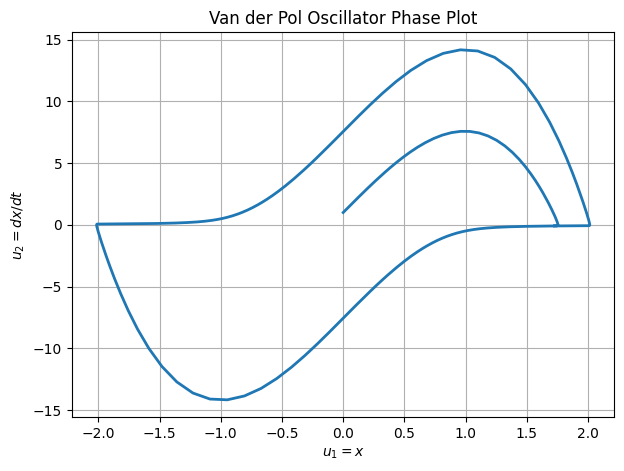

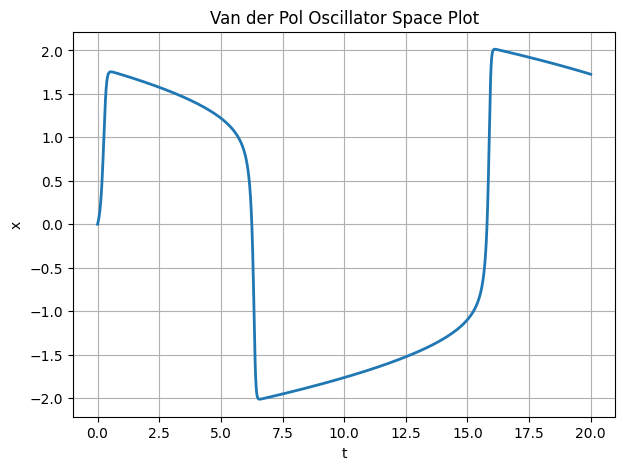

In [4]:
#Exercise 1: 2nd Order ODE (Van Der Pol oscillations)
# Van der Pol system
def van_der_pol(u, mu=10):
    #u is the state vector
    #mu is a parameter
    u1, u2 = u
    du1 = u2
    du2 = mu*(1 - u1**2)*u2 - u1
    return np.array([du1, du2])

#Note to self for which variable is which: for van der pol -> y is x, x is t. Using state vector, instead of solving for x(t), we solve for u1, u2 

# Initial values
u = np.array([0, 1])  # u1(0), u2(0)
t = 0.0
h = 0.01
t_end = 20

# Storage
t_values = [t]
u1_values = [u[0]]
u2_values = [u[1]]

# Time loop
while t < t_end:
    u = rungeKutta(u, h, van_der_pol)
    t += h

    t_values.append(t)
    u1_values.append(u[0])
    u2_values.append(u[1])

# Plot phase space
plt.figure(figsize=(7,5))
plt.plot(u1_values, u2_values, lw=2)
plt.title("Van der Pol Oscillator Phase Plot")
plt.xlabel("$u_1 = x$")
plt.ylabel("$u_2 = dx/dt$")
plt.grid()
plt.show()

#plot t vs x
plt.figure(figsize =(7,5))
plt.plot(t_values, u1_values, lw = 2)
plt.title("Van der Pol Oscillator Space Plot")
plt.xlabel("t")
plt.ylabel("x")
plt.grid()
plt.show()

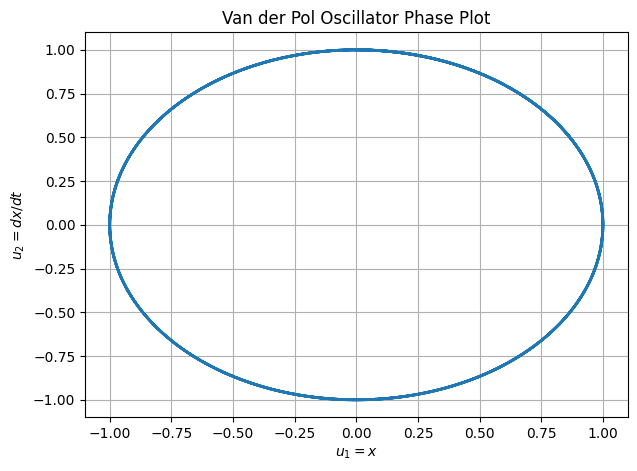

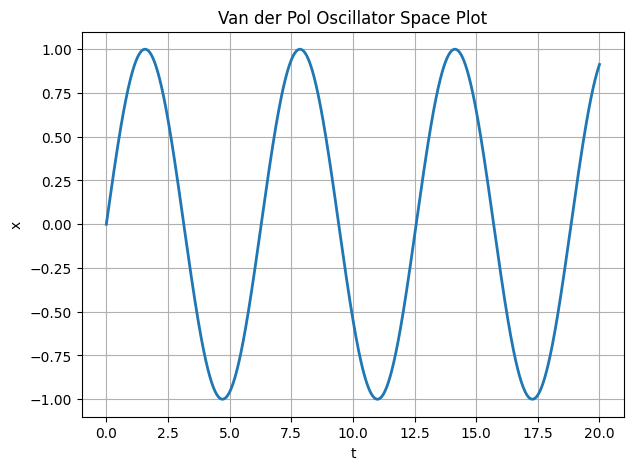

In [20]:
#Let's try van der pol for mu = 0, which should give us the results for a simple harmonic oscillator (this is obvious from the equation)
# Van der Pol system
def van_der_pol(u, mu=0):
    #u is the state vector
    #mu is a parameter
    u1, u2 = u
    du1 = u2
    du2 = mu*(1 - u1**2)*u2 - u1
    return np.array([du1, du2])

#Note to self for which variable is which: for van der pol -> y is x, x is t. Using state vector, instead of solving for x(t), we solve for u1, u2 

# Initial values
u = np.array([0, 1])  # u1(0), u2(0)
t = 0.0
h = 0.01
t_end = 20

# Storage
t_values = [t]
u1_values = [u[0]]
u2_values = [u[1]]

# Time loop
while t < t_end:
    u = rungeKutta(u, h, van_der_pol)
    t += h

    t_values.append(t)
    u1_values.append(u[0])
    u2_values.append(u[1])

# Plot phase space
plt.figure(figsize=(7,5))
plt.plot(u1_values, u2_values, lw=2)
plt.title("Van der Pol Oscillator Phase Plot")
plt.xlabel("$u_1 = x$")
plt.ylabel("$u_2 = dx/dt$")
plt.grid()
plt.show()

#plot t vs x
plt.figure(figsize =(7,5))
plt.plot(t_values, u1_values, lw = 2)
plt.title("Van der Pol Oscillator Space Plot")
plt.xlabel("t")
plt.ylabel("x")
plt.grid()
plt.show()

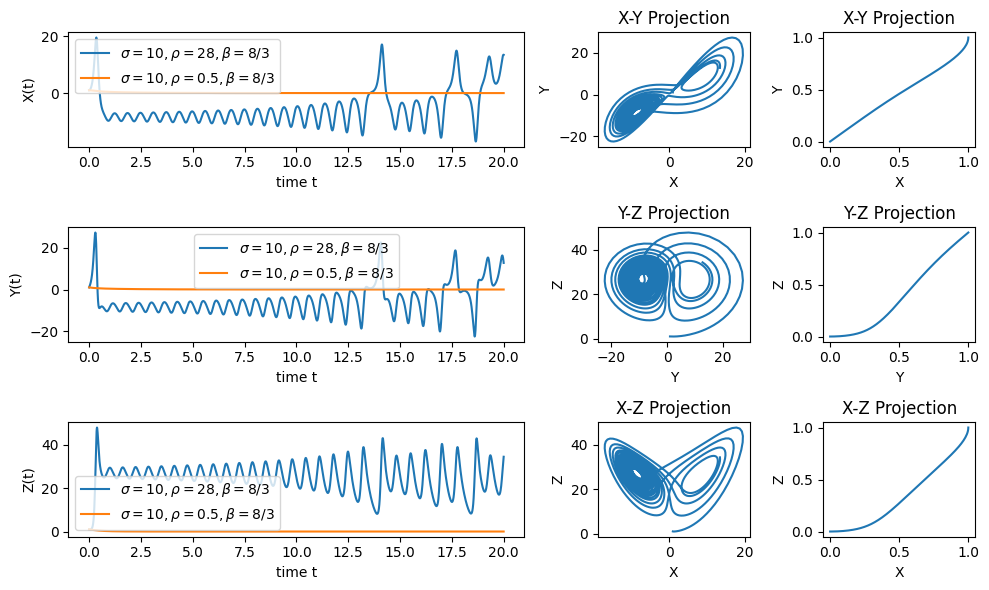

In [18]:
#let's define the state vector u = [x, y, z]
def lorenz(u, sigma, rho, beta): 
    x, y, z = u
    dx = sigma*(y-x)
    dy = x*(rho - z) - y
    dz = x*y - beta*z
    return np.array([dx, dy, dz])

def lorenz_simulator(sigma, rho, beta): 
    # Initial values
    u = np.array([1,1,1])  # x(0), y(0), z(0)
    t = 0.0
    h = 0.01
    t_end = 20

    # Storage
    t_values = [t]
    x_values = [u[0]]
    y_values = [u[1]]
    z_values = [u[2]]

    # Time loop
    while t < t_end:
        u = rungeKutta(u, h, lorenz, sigma, rho, beta)
        t += h

        t_values.append(t)
        x_values.append(u[0])
        y_values.append(u[1])
        z_values.append(u[2])
    
    return np.array(t_values), np.array(x_values), np.array(y_values), np.array(z_values)

#define 2 sets of parametes
sigmaA, rhoA, betaA = 10, 28, 8/3
sigmaB, rhoB, betaB = 10, 0.5, 8/3

# Run simulations
tA, xA, yA, zA = lorenz_simulator(sigmaA, rhoA, betaA)
tB, xB, yB, zB = lorenz_simulator(sigmaB, rhoB, betaB)

fig, axs = plt.subplots(3, 3, figsize=(10, 6), gridspec_kw={'width_ratios': [3, 1, 1]})

# Time series
axs[0, 0].plot(tA, xA, label=r"$\sigma = 10, \rho = 28, \beta = 8/3$")
axs[0, 0].plot(tB, xB, label=r"$\sigma = 10, \rho = 0.5, \beta = 8/3$")
axs[0, 0].legend()
axs[0, 0].set_ylabel("X(t)")

axs[1, 0].plot(tA, yA, label=r"$\sigma = 10, \rho = 28, \beta = 8/3$")
axs[1, 0].plot(tB, yB, label=r"$\sigma = 10, \rho = 0.5, \beta = 8/3$")
axs[1, 0].legend()
axs[1, 0].set_ylabel("Y(t)")

axs[2, 0].plot(tA, zA, label=r"$\sigma = 10, \rho = 28, \beta = 8/3$")
axs[2, 0].plot(tB, zB, label=r"$\sigma = 10, \rho = 0.5, \beta = 8/3$")
axs[2, 0].legend()
axs[2, 0].set_ylabel("Z(t)")

# add xlabel to all time series
for ax in axs[:, 0]:
    ax.set_xlabel("time t")

# 2D projections 
axs[0, 1].plot(xA, yA)
axs[0, 1].set(title="X-Y Projection", xlabel="X", ylabel="Y")

axs[1, 1].plot(yA, zA)
axs[1, 1].set(title="Y-Z Projection", xlabel="Y", ylabel="Z")

axs[2, 1].plot(xA, zA)
axs[2, 1].set(title="X-Z Projection", xlabel="X", ylabel="Z")

# 2D projections 
axs[0, 2].plot(xB, yB)
axs[0, 2].set(title="X-Y Projection", xlabel="X", ylabel="Y")

axs[1, 2].plot(yB, zB)
axs[1, 2].set(title="Y-Z Projection", xlabel="Y", ylabel="Z")

axs[2, 2].plot(xB, zB)
axs[2, 2].set(title="X-Z Projection", xlabel="X", ylabel="Z")

fig.tight_layout()

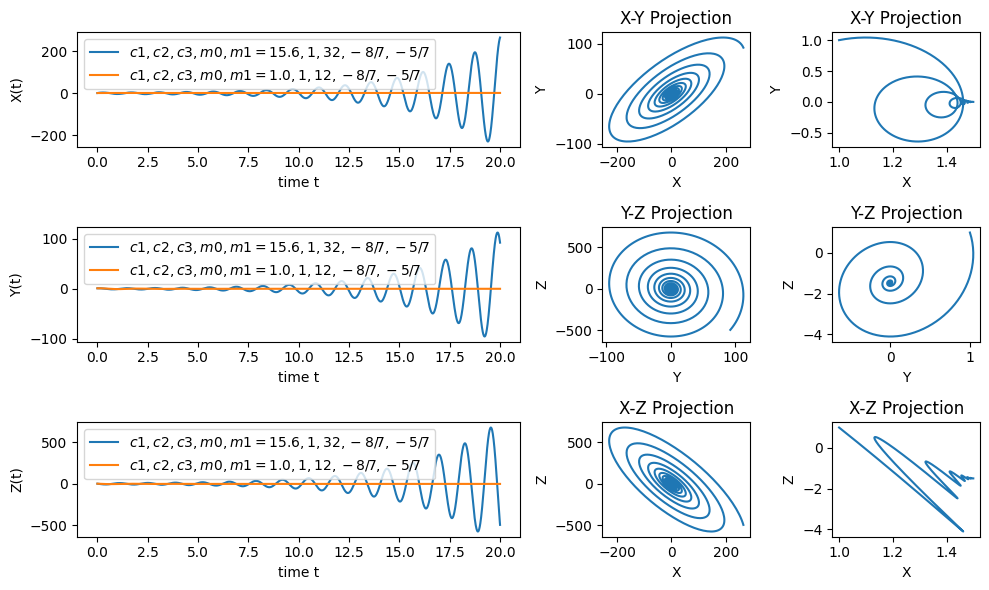

In [10]:
def f(x, m0, m1):
    return m1*x  + (m0 - m1)*(np.abs(x+ 1) - np.abs(x - 1)) / 2

def chua_circuit(u, c1, c2, c3, m0, m1):
    x, y, z = u
    dx = c1*(y - x - f(x, m0, m1))
    dy = c2*(x - y + z)
    dz = -c3*y
    return np.array([dx, dy, dz])

def chua_circuit_simulator(c1, c2, c3, m0, m1): 
    # Initial values
    u = np.array([1,1,1])  # x(0), y(0), z(0)
    t = 0.0
    h = 0.01
    t_end = 20

    # Storage
    t_values = [t]
    x_values = [u[0]]
    y_values = [u[1]]
    z_values = [u[2]]

    # Time loop
    while t < t_end:
        u = rungeKutta(u, h, chua_circuit, c1, c2, c3, m0, m1)
        t += h

        t_values.append(t)
        x_values.append(u[0])
        y_values.append(u[1])
        z_values.append(u[2])
    
    return np.array(t_values), np.array(x_values), np.array(y_values), np.array(z_values)

#define 2 sets of parametes
c1a, c2a, c3a, m0a, m1a = 15.6, 1, 32, -8/7, -5/7
c1b, c2b, c3b, m0b, m1b = 1, 1, 12, -8/7, -5/7

# Run simulations
tA, xA, yA, zA = chua_circuit_simulator(c1a, c2a, c3a, m0a, m1a)
tB, xB, yB, zB = chua_circuit_simulator(c1b, c2b, c3b, m0b, m1b)

fig, axs = plt.subplots(3, 3, figsize=(10, 6), gridspec_kw={'width_ratios': [3, 1, 1]})

# Time series
axs[0, 0].plot(tA, xA, label=r"$c1, c2, c3, m0, m1 = 15.6, 1, 32, -8/7, -5/7$")
axs[0, 0].plot(tB, xB, label=r"$c1, c2, c3, m0, m1 = 1.0, 1, 12, -8/7, -5/7$")
axs[0, 0].legend()
axs[0, 0].set_ylabel("X(t)")

axs[1, 0].plot(tA, yA, label=r"$c1, c2, c3, m0, m1 = 15.6, 1, 32, -8/7, -5/7$")
axs[1, 0].plot(tB, yB, label=r"$c1, c2, c3, m0, m1 = 1.0, 1, 12, -8/7, -5/7$")
axs[1, 0].legend()
axs[1, 0].set_ylabel("Y(t)")

axs[2, 0].plot(tA, zA, label=r"$c1, c2, c3, m0, m1 = 15.6, 1, 32, -8/7, -5/7$")
axs[2, 0].plot(tB, zB, label=r"$c1, c2, c3, m0, m1 = 1.0, 1, 12, -8/7, -5/7$")
axs[2, 0].legend()
axs[2, 0].set_ylabel("Z(t)")

# add xlabel to all time series
for ax in axs[:, 0]:
    ax.set_xlabel("time t")

# 2D projections 
axs[0, 1].plot(xA, yA)
axs[0, 1].set(title="X-Y Projection", xlabel="X", ylabel="Y")

axs[1, 1].plot(yA, zA)
axs[1, 1].set(title="Y-Z Projection", xlabel="Y", ylabel="Z")

axs[2, 1].plot(xA, zA)
axs[2, 1].set(title="X-Z Projection", xlabel="X", ylabel="Z")

# 2D projections 
axs[0, 2].plot(xB, yB)
axs[0, 2].set(title="X-Y Projection", xlabel="X", ylabel="Y")

axs[1, 2].plot(yB, zB)
axs[1, 2].set(title="Y-Z Projection", xlabel="Y", ylabel="Z")

axs[2, 2].plot(xB, zB)
axs[2, 2].set(title="X-Z Projection", xlabel="X", ylabel="Z")

fig.tight_layout()